In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

df = pd.read_csv('/content/drive/MyDrive/Elevate/Mall_Customers.csv')
print(df.head())
print(df.columns)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:

df_clean = df.drop('CustomerID', axis=1)
df_clean['Gender'] = LabelEncoder().fit_transform(df_clean['Gender'])

print(df_clean.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


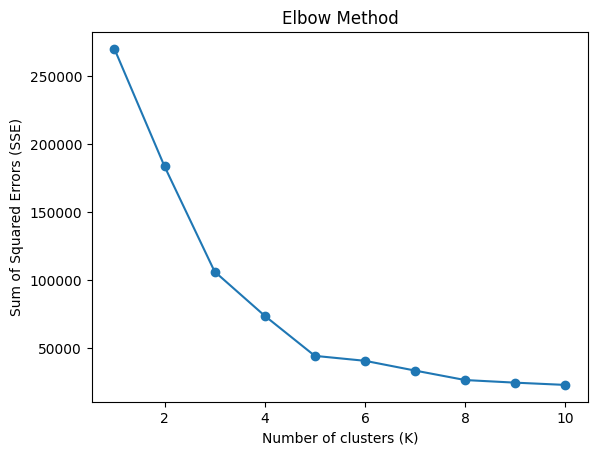

In [6]:
# Elbow method to find the optimal K
sse = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_clean[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)

# Plotting the Elbow Curve
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


In [7]:
# Fit KMeans with the optimal K (let's assume K=5 based on elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(df_clean[['Annual Income (k$)', 'Spending Score (1-100)']])

df_clean['Cluster'] = labels

print(df_clean.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        4
1       1   21                  15                      81        2
2       0   20                  16                       6        4
3       0   23                  16                      77        2
4       0   31                  17                      40        4


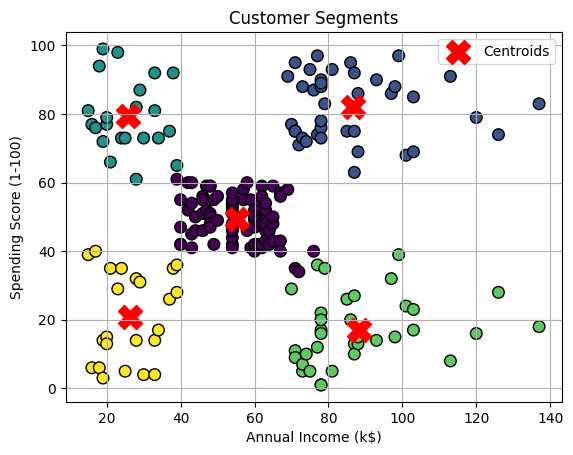

In [8]:
# Visualize clusters
plt.scatter(df_clean['Annual Income (k$)'], df_clean['Spending Score (1-100)'],
            c=labels, cmap='viridis', edgecolor='k', s=70)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Evaluate using Silhouette Score
score = silhouette_score(df_clean[['Annual Income (k$)', 'Spending Score (1-100)']], labels)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.554


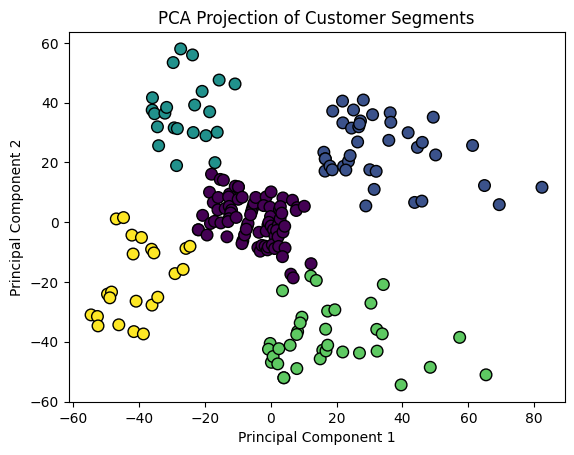

In [11]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_clean[['Annual Income (k$)', 'Spending Score (1-100)']])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=70)
plt.title('PCA Projection of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
